In [1]:
import tensorflow as tf 
from tensorflow.keras import  Sequential 
from tensorflow.keras.layers import  Dense 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import  StandardScaler 
from sklearn.model_selection import train_test_split 

import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# 1️⃣ Load dataset
data=fetch_california_housing()

X,y=data.data,data.target

In [3]:
# 2️⃣ Split into training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [22]:
# 3️⃣ Scale the features
from sklearn.preprocessing import  StandardScaler 
scalar=StandardScaler()

X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)


In [23]:
# 4️⃣ Build the neural network model

model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='linear')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#4128 8 * 8 64
#4128 64 * 64 32
#4128 32 * 32 1

# Compile the model

from tensorflow.keras.losses import  MeanSquaredError


model.compile(optimizer='adam',loss=MeanSquaredError(), metrics=['mae'])



In [25]:
# 5️⃣ Train the model

history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 2.0609 - mae: 0.9162 - val_loss: 0.4542 - val_mae: 0.4817
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.4204 - mae: 0.4586 - val_loss: 0.4109 - val_mae: 0.4483
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.3655 - mae: 0.4271 - val_loss: 0.3864 - val_mae: 0.4336
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3568 - mae: 0.4213 - val_loss: 0.3796 - val_mae: 0.4373
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.3261 - mae: 0.4063 - val_loss: 0.3706 - val_mae: 0.4415
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.3341 - mae: 0.4115 - val_loss: 0.3509 - val_mae: 0.4191
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3172 - mae: 0.3974 - val_loss: 0.3433 - val_mae: 0.4097
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.3213 - mae: 0.3928 - val_loss: 0.3389 - val_mae: 0.4111
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 

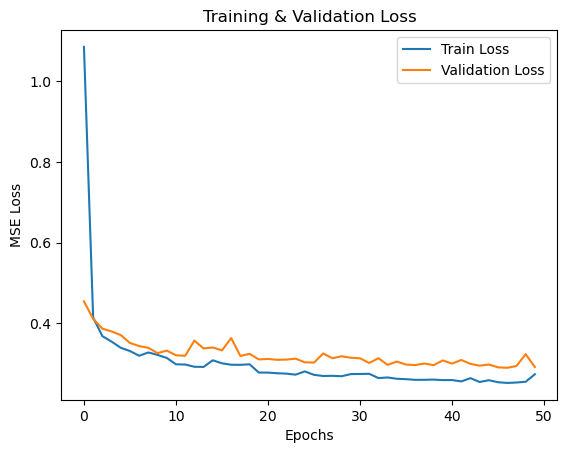

In [26]:


# 6️⃣ Plot the loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


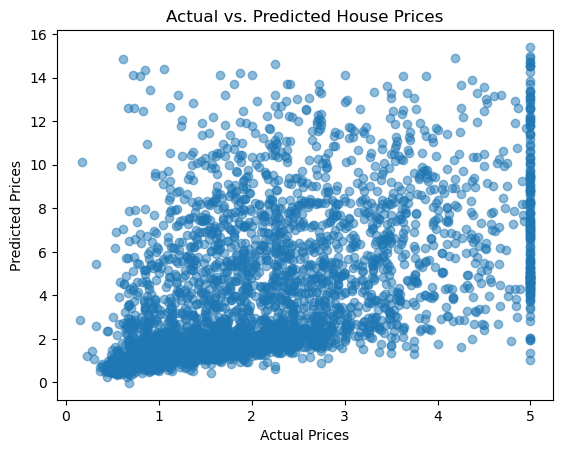

In [32]:
# Predict prices on test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()